In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tabulate
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import preprocessing

## Variance Compensation Transformations

If the variance is not stable, to fix this problem is essential. Otherwise the parameters which returned by regression will be have high variance. Thus, because of that the standard errors of parameters will be much more high, the inferences of model might be misleading.

$ \sigma^2 \propto stable \to $ there is no need to transformation<br>
$ \sigma^2 \propto E(y)   \to \sqrt{y}  $ <br>
$ \sigma^2 \propto E(y)[1-E(y)]\to sin^{-1}(\sqrt{y})  $ <br>
$ \sigma^2 \propto [E(y)]^2   \to ln(y)  $ <br>
$ \sigma^2 \propto [E(y)]^3    \to y^{-1/2}  $ <br>
$ \sigma^2 \propto [E(y)]^4   \to  y^{-1}  $


In [2]:
data=pd.read_excel('ILR.xlsx', sheet_name='Sayfa1')

In [3]:
data.head()

,y,x
0,0.79,679
1,0.44,292
2,0.56,1012
3,0.79,493
4,2.70,582


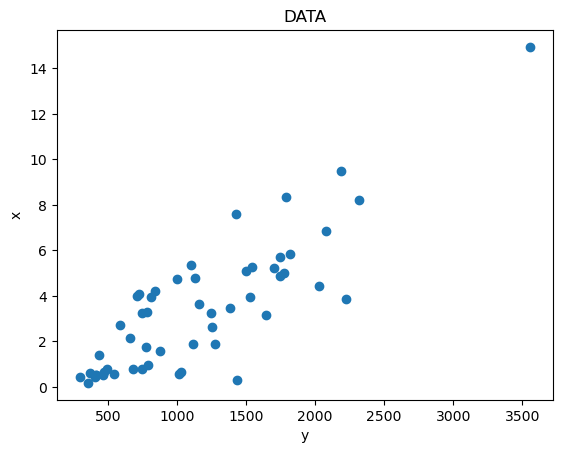

In [4]:
plt.scatter(data['x'],data['y'])
plt.xlabel('y')
plt.ylabel('x')
plt.title('DATA')
plt.show()

# $ y=\beta_{0}+\beta_{1}x+\epsilon$

In [5]:
model=smf.ols('y~x', data=data).fit()

In [6]:
resids=model.resid

### $\sigma^2=\frac{\sum(\epsilon_{i})^2}{n-1}$

In [8]:
S_square=np.sum(resids**2)/(len(data['y'])-1)
di=resids/np.sqrt(S_square)

In [9]:
predicted=model.predict()

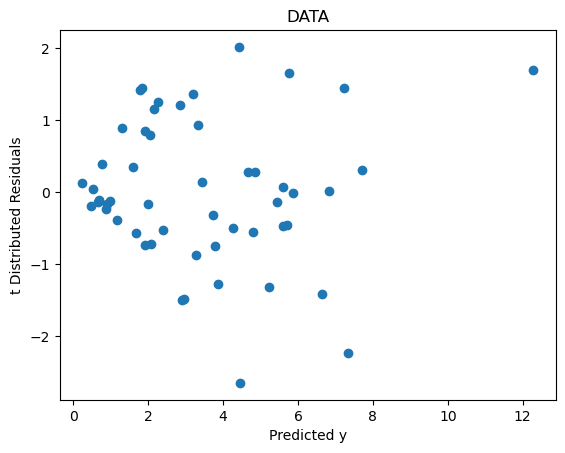

In [10]:
plt.scatter(predicted, di)
plt.xlabel('Predicted y')
plt.ylabel('t Distributed Residuals')
plt.title('DATA')
plt.show()

### Tranformation

In [11]:
y=np.array(data['y'])
x=np.array(data['x'])
cons=np.ones(len(y))
indep=np.column_stack((cons,x))

In [12]:
Y=np.sqrt(y)

# $ y^2=\beta_{0}+\beta_{1}x+\epsilon$

In [13]:
model2=sm.OLS(Y,indep).fit()

In [14]:
resids2=model2.resid

In [16]:
S_square2=np.sum(resids2**2)/(len(data['y'])-1)
di2=resids2/np.sqrt(S_square2)

In [17]:
predicted2=model2.predict()

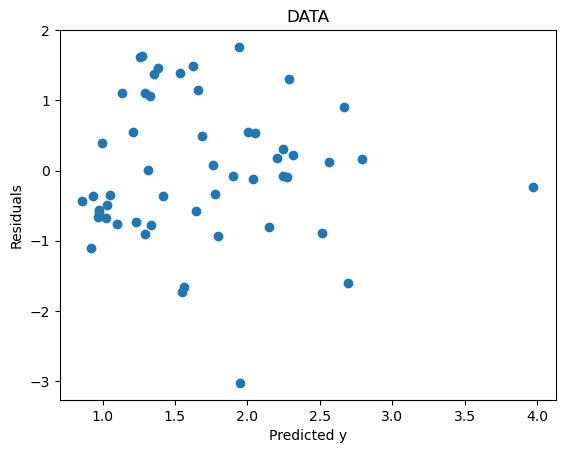

In [18]:
plt.scatter(predicted2, di2)
plt.xlabel('Predicted y')
plt.ylabel('Residuals')
plt.title('DATA')
plt.show()

### To Linearize Models 

Some models can be transformed to linear models. These models are linear as essentially. With transformation process, model is linearized and can be reached to more accurate results.

### $y=\beta_{0}x^{\beta_{1}}~~~~transformation~\to~~~y'=logy, x'=logx \to y'=log\beta_{0}+\beta_{1}x' $ <br><br>
### $y=\beta_{0}\epsilon^{\beta_{1}x}~~~~transformation~\to~~~y'=lny \to y'=ln\beta_{0}+\beta_{1}x $ <br><br>
### $y=\beta_{0}+\beta_{1}logx~~~~transformation~\to~~~ x'=logx \to y=\beta_{0}+\beta_{1}x' $ <br><br>
### $y=\frac{x}{\beta_{0}x-{\beta_{1}}}~~~~transformation~\to~~~y'=\frac{1}{y}, x'=\frac{1}{x} \to y'=\beta_{0}-\beta_{1}x' $

In [19]:
data1=pd.read_excel('ILR.xlsx',sheet_name='Sayfa2')

In [20]:
data1.head()

,y,x
0,1.582,5.0
1,1.822,6.0
2,1.057,3.4
3,0.500,2.7
4,2.236,10.0


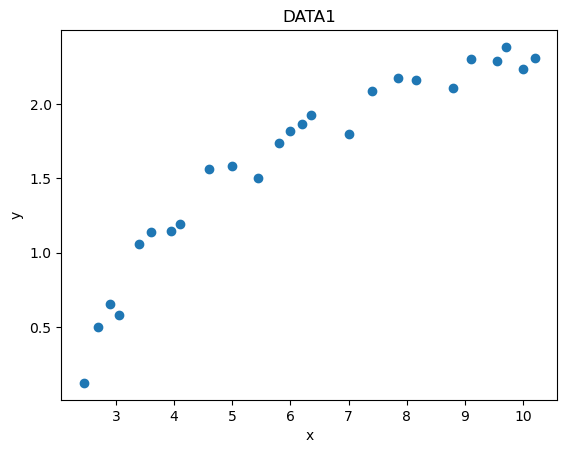

In [21]:
plt.scatter(data1['x'],data1['y'])
plt.xlabel('x')
plt.ylabel('y')
plt.title('DATA1')
plt.show()

# $y=\beta_{0}+\beta_{1}x+\epsilon$

In [22]:
model3=smf.ols('y~x',data=data1).fit()

In [23]:
resids3=model3.resid
predicted3=model3.predict()

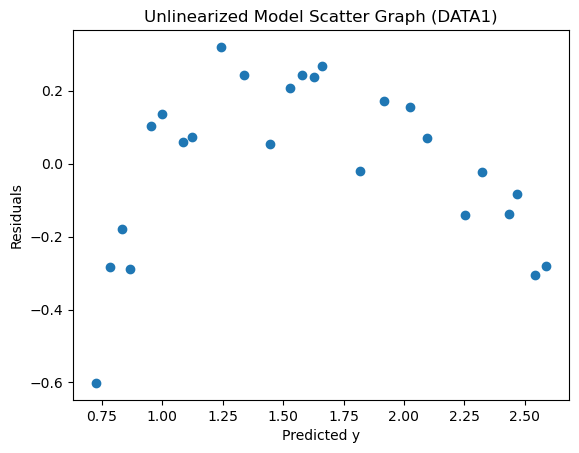

In [24]:
plt.scatter(predicted3,resids3)
plt.xlabel('Predicted y')
plt.ylabel('Residuals')
plt.title('Unlinearized Model Scatter Graph (DATA1)')
plt.show()

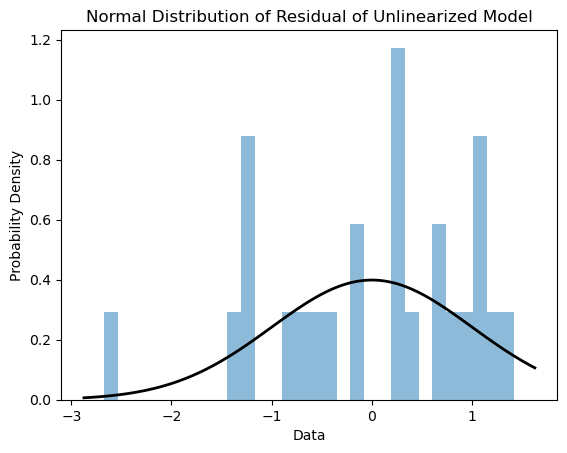

In [25]:
y=np.asarray(resids3).reshape(len(resids3),1)
scaler = preprocessing.StandardScaler().fit(y)
X_scaled = scaler.transform(y)
plt.hist(X_scaled, bins=30, density=True, alpha=0.5)
mu, std = np.mean(X_scaled), np.std(X_scaled)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = np.exp(-(x-mu)**2/(2*std**2))/(std*np.sqrt(2*np.pi))
plt.plot(x, p, 'k', linewidth=2)
plt.xlabel('Data')
plt.ylabel('Probability Density')
plt.title('Normal Distribution of Residual of Unlinearized Model')
plt.show()

In [26]:
y=np.array(data1['y'])
x=np.array(data1['x'])
x=1/x
cons=np.ones(len(x))
indep=np.column_stack((cons,x))

# $y=\beta_{0}+\beta_{1}(1/x)+\epsilon$

In [27]:
model4=sm.OLS(y,indep).fit()

In [28]:
resids4=model4.resid
predicted4=model4.predict()

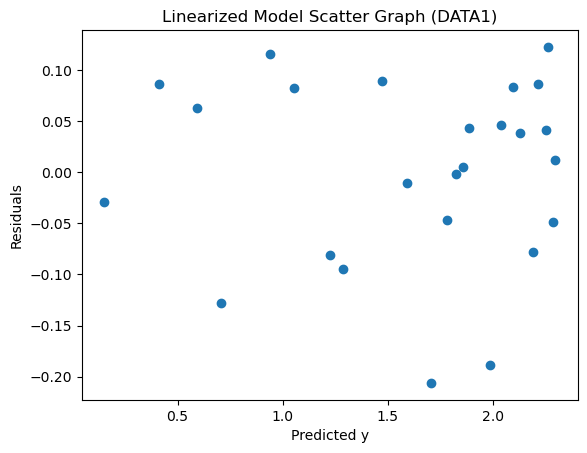

In [29]:
plt.scatter(predicted4,resids4)
plt.xlabel('Predicted y')
plt.ylabel('Residuals')
plt.title('Linearized Model Scatter Graph (DATA1)')
plt.show()

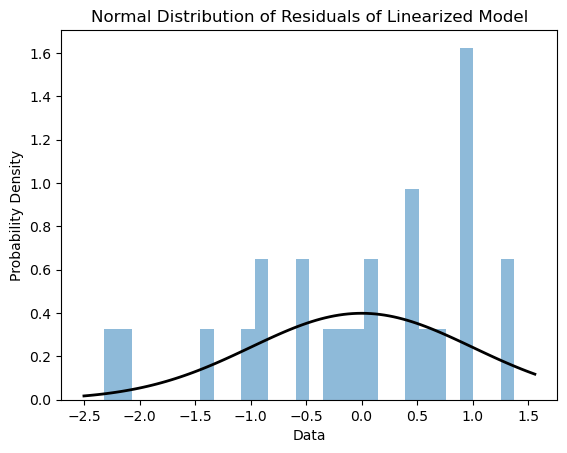

In [30]:
y=np.asarray(resids4).reshape(len(resids4),1)
scaler = preprocessing.StandardScaler().fit(y)
X_scaled = scaler.transform(y)
plt.hist(X_scaled, bins=30, density=True, alpha=0.5)
mu, std = np.mean(X_scaled), np.std(X_scaled)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = np.exp(-(x-mu)**2/(2*std**2))/(std*np.sqrt(2*np.pi))
plt.plot(x, p, 'k', linewidth=2)
plt.xlabel('Data')
plt.ylabel('Probability Density')
plt.title('Normal Distribution of Residuals of Linearized Model')
plt.show()

## Analytic Transformation Methods

### Box-Cox Method

In [31]:
from scipy import stats as st

In [32]:
res_boxcox=st.boxcox(data['y'], lmbda=None, alpha=0.05, optimizer=None)

In [33]:
# res_boxcox[0] ----> transformed array.
# res_boxcox[1] ----> the lmbda that maximizes the log-likelihood function.
# res_boxcox[2] ----> represents the minimum and maximum confidence limits given alpha.

In [34]:
print(f' Lambda Value: {res_boxcox[1]}')

 Lambda Value: 0.27730251127015687


In [35]:
y=np.array(data['y'])**res_boxcox[1]
x=np.array(data['x'])
cons=np.ones(len(x))
indep=np.column_stack((cons,x))

# $ y^{\lambda}=\beta_{0}+\beta_{1}x+\epsilon$

In [36]:
model5=sm.OLS(y,indep).fit()

In [37]:
resids5=model5.resid
predicted5=model5.predict()

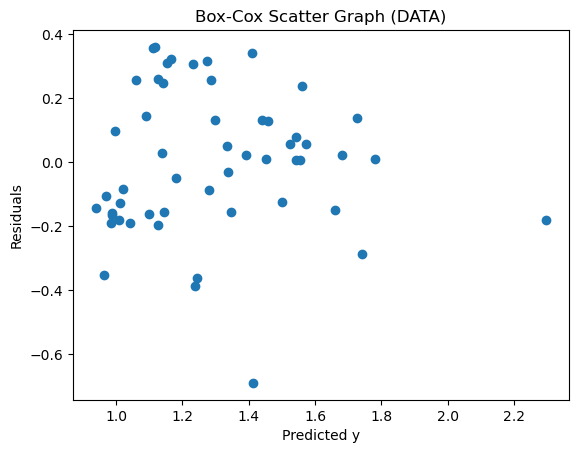

In [38]:
plt.scatter(predicted5,resids5)
plt.xlabel('Predicted y')
plt.ylabel('Residuals')
plt.title('Box-Cox Scatter Graph (DATA)')
plt.show()

### Box-Tidwell

In [39]:
y=np.array(data1['y'])
x=np.array(data1['x'])
cons=np.ones(len(x))
indep=np.column_stack((cons,x))

# $y=\beta_{0}+\beta_{1}x+\epsilon$

In [40]:
model6=sm.OLS(y,indep).fit()

In [41]:
model6.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
const,0.1345,0.125,1.073,0.295,-0.125,0.394
x1,0.2407,0.019,12.701,0.000,0.202,0.280


$w=xlog(x) $

In [42]:
w=x*np.log(x)
indep=np.column_stack((cons,x,w))

# $y=\beta_{0}+\beta_{1}x+\gamma{w}+\epsilon$

In [43]:
model7=sm.OLS(y,indep).fit()

In [44]:
model7.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
const,-2.4035,0.282,-8.516,0.000,-2.989,-1.818
x1,1.5290,0.140,10.886,0.000,1.238,1.820
x2,-0.4608,0.050,-9.190,0.000,-0.565,-0.357


## $\alpha_{1}=\frac{\hat{\gamma}}{\hat{\beta_{1}}}+1$

In [45]:
a1=(-0.4608/0.2407)+1
print(a1)

-0.9144162858329872


In [46]:
x=x**a1
indep=np.column_stack((cons,x))

# $y=\beta_{0}+\beta_{1}x^{\alpha_{1}}+\epsilon$

In [47]:
model8=sm.OLS(y,indep).fit()

In [48]:
model8.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
const,3.1083,0.047,66.295,0.000,3.011,3.205
x1,-6.6543,0.192,-34.670,0.000,-7.051,-6.257


In [49]:
resids8=model8.resid
predicted8=model8.predict()

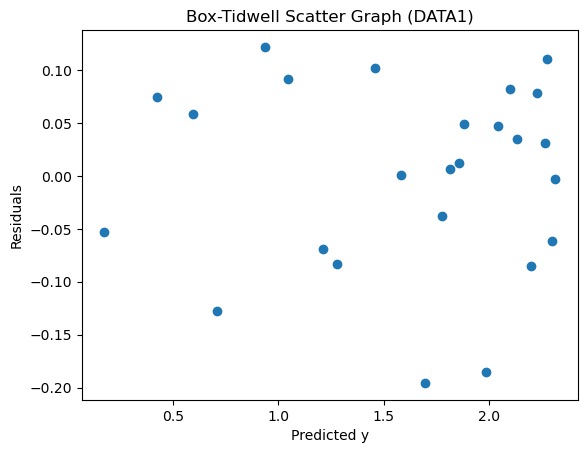

In [50]:
plt.scatter(predicted8,resids8)
plt.xlabel('Predicted y')
plt.ylabel('Residuals')
plt.title('Box-Tidwell Scatter Graph (DATA1)')
plt.show()